In [498]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pycaret.regression import *
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from matplotlib import pyplot as plt

In [499]:
df=pd.read_csv('./dataset/train.csv')

In [500]:
df

,ID,electricity_kwh_per_month,natural_gas_therms_per_month,vehicle_miles_per_month,house_area_sqft,water_usage_liters_per_day,public_transport_usage_per_week,household_size,home_insulation_quality,meat_consumption_kg_per_week,laundry_loads_per_week,recycles_regularly,composts_organic_waste,uses_solar_panels,energy_efficient_appliances,heating_type,diet_type,owns_pet,smart_thermostat_installed,carbon_footprint
0,0xd6c,759.70,55.95,944.55,2422.07,541.27,1,3,2,4.23,9,1.0,0.0,0,1.0,gas,vegetarian,1,NaN,830.10
1,0x3fdf,387.06,70.59,1280.85,1995.3,280.39,1,2,1,3.27,8,0.0,0.0,0,0.0,electric,vegetarian,0,0.0,963.08
2,0x3b08,594.25,29.14,1005.72,2673.55,416.14,0,2,3,2.87,3,0.0,1.0,0,1.0,electric,omnivore,1,1.0,840.11
3,0x31e5,503.76,74.68,1049.46,2994.28,530.13,0,5,1,3.22,9,1.0,0.0,0,0.0,electric,omnivore,1,0.0,1252.42
4,0x397e,549.54,-77.00,756.49,2549.57,604.10,5,4,4,2.92,2,1.0,0.0,0,1.0,electric,vegetarian,0,1.0,580.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,0x4aaa,324.96,43.37,438.36,1514.05,419.48,3,1,2,3.17,7,0.0,0.0,0,0.0,electric,omnivore,1,1.0,865.07
13996,0x36c3,581.19,83.50,1865.29,3357.9,651.11,0,1,3,6.60,3,1.0,1.0,0,0.0,gas,omnivore,1,0.0,1594.70
13997,0x3846,302.76,43.36,212.42,939.08,343.67,9,1,2,3.07,3,1.0,0.0,1,0.0,gas,omnivore,1,1.0,712.94
13998,0x4ba4,397.77,14.80,592.66,1164.04,271.67,2,7,0,2.48,4,1.0,0.0,1,0.0,gas,vegetarian,0,0.0,533.65


In [501]:
df.columns

Index(['ID', 'electricity_kwh_per_month', 'natural_gas_therms_per_month',
       'vehicle_miles_per_month', 'house_area_sqft',
       'water_usage_liters_per_day', 'public_transport_usage_per_week',
       'household_size', 'home_insulation_quality',
       'meat_consumption_kg_per_week', 'laundry_loads_per_week',
       'recycles_regularly', 'composts_organic_waste', 'uses_solar_panels',
       'energy_efficient_appliances', 'heating_type', 'diet_type', 'owns_pet',
       'smart_thermostat_installed', 'carbon_footprint'],
      dtype='object')

In [502]:
df.dtypes

ID                                  object
electricity_kwh_per_month          float64
natural_gas_therms_per_month       float64
vehicle_miles_per_month            float64
house_area_sqft                     object
water_usage_liters_per_day         float64
public_transport_usage_per_week      int64
household_size                      object
home_insulation_quality              int64
meat_consumption_kg_per_week       float64
laundry_loads_per_week               int64
recycles_regularly                 float64
composts_organic_waste             float64
uses_solar_panels                    int64
energy_efficient_appliances        float64
heating_type                        object
diet_type                           object
owns_pet                             int64
smart_thermostat_installed         float64
carbon_footprint                   float64
dtype: object

In [503]:
df=df.drop(columns=['ID'])

In [504]:
df.isna().sum()

electricity_kwh_per_month            0
natural_gas_therms_per_month         0
vehicle_miles_per_month              0
house_area_sqft                      0
water_usage_liters_per_day           0
public_transport_usage_per_week      0
household_size                       0
home_insulation_quality              0
meat_consumption_kg_per_week         0
laundry_loads_per_week               0
recycles_regularly                 410
composts_organic_waste             390
uses_solar_panels                    0
energy_efficient_appliances        431
heating_type                         0
diet_type                            0
owns_pet                             0
smart_thermostat_installed         416
carbon_footprint                     0
dtype: int64

In [505]:
df['recycles_regularly'].unique()
mode_value = df['recycles_regularly'].mode()[0]
df['recycles_regularly'] = df['recycles_regularly'].fillna(mode_value)
print("Null values after filling:", df['recycles_regularly'].isna().sum())

Null values after filling: 0


In [506]:
mode_value = df['composts_organic_waste'].mode()[0]
df['composts_organic_waste'] = df['composts_organic_waste'].fillna(mode_value)
print("Null values after filling:", df['composts_organic_waste'].isna().sum())

Null values after filling: 0


In [507]:
mode_value = df['smart_thermostat_installed'].mode()[0]
df['smart_thermostat_installed'] = df['smart_thermostat_installed'].fillna(mode_value)
print("Null values after filling:", df['smart_thermostat_installed'].isna().sum())

Null values after filling: 0


In [508]:
mode_value = df['energy_efficient_appliances'].mode()[0]
df['energy_efficient_appliances'] = df['energy_efficient_appliances'].fillna(mode_value)
print("Null values after filling:", df['energy_efficient_appliances'].isna().sum())

Null values after filling: 0


In [509]:
df['diet_type']=df['diet_type'].astype('category')
df['diet_type']=df['diet_type'].cat.codes

In [510]:
df['heating_type'] = df['heating_type'].apply(lambda x: x if x in ['gas', 'electric'] else 'unknown')
print(df['heating_type'].value_counts())
df['heating_type']=df['heating_type'].astype('category')
df['heating_type']=df['heating_type'].cat.codes

heating_type
gas         6788
electric    5459
unknown     1753
Name: count, dtype: int64


In [511]:
df['house_area_sqft'] = (
    df['house_area_sqft']
    .replace(r'[^0-9.]', '', regex=True)  
    .replace(r'^\.+$', '', regex=True)   
    .replace('', None)                   
)
df['house_area_sqft'] = pd.to_numeric(df['house_area_sqft'], errors='coerce')
print("Data type after conversion:", df['house_area_sqft'].dtype)
print("\nSample of converted values:")
print(df['house_area_sqft'].head())


mean_value = df['house_area_sqft'].mean()
df['house_area_sqft'] = df['house_area_sqft'].fillna(mean_value)

print("Null values after filling:", df['house_area_sqft'].isna().sum())

Data type after conversion: float64

Sample of converted values:
0    2422.07
1    1995.30
2    2673.55
3    2994.28
4    2549.57
Name: house_area_sqft, dtype: float64
Null values after filling: 0


In [512]:
df['household_size'] = df['household_size'].apply(lambda x: x if str(x).isdigit() else np.nan)

most_frequent = df['household_size'].mode()[0]
df['household_size'] = df['household_size'].fillna(most_frequent)
df['household_size']=df['household_size'].astype('category')
df['household_size']=df['household_size'].cat.codes

In [513]:
negative_columns = df.columns[(df < 0).any()]
print("Columns with negative values:\n", negative_columns)

Columns with negative values:
 Index(['electricity_kwh_per_month', 'natural_gas_therms_per_month',
       'vehicle_miles_per_month', 'water_usage_liters_per_day',
       'public_transport_usage_per_week', 'home_insulation_quality'],
      dtype='object')


In [514]:
columns_to_clean = ['electricity_kwh_per_month', 'natural_gas_therms_per_month',
                    'vehicle_miles_per_month', 'water_usage_liters_per_day',
                    'public_transport_usage_per_week', 'home_insulation_quality']


for col in columns_to_clean:
    df[col] = df[col].apply(lambda x: np.nan if x < 0 else x)


for col in columns_to_clean:
    df[col] = df[col].fillna(df[col].median())

In [515]:
negative_columns = df.columns[(df < 0).any()]
print("Columns with negative values:\n", negative_columns)

Columns with negative values:
 Index([], dtype='object')


In [516]:
df.dtypes

electricity_kwh_per_month          float64
natural_gas_therms_per_month       float64
vehicle_miles_per_month            float64
house_area_sqft                    float64
water_usage_liters_per_day         float64
public_transport_usage_per_week    float64
household_size                        int8
home_insulation_quality            float64
meat_consumption_kg_per_week       float64
laundry_loads_per_week               int64
recycles_regularly                 float64
composts_organic_waste             float64
uses_solar_panels                    int64
energy_efficient_appliances        float64
heating_type                          int8
diet_type                             int8
owns_pet                             int64
smart_thermostat_installed         float64
carbon_footprint                   float64
dtype: object

In [517]:
df.isna().sum()

electricity_kwh_per_month          0
natural_gas_therms_per_month       0
vehicle_miles_per_month            0
house_area_sqft                    0
water_usage_liters_per_day         0
public_transport_usage_per_week    0
household_size                     0
home_insulation_quality            0
meat_consumption_kg_per_week       0
laundry_loads_per_week             0
recycles_regularly                 0
composts_organic_waste             0
uses_solar_panels                  0
energy_efficient_appliances        0
heating_type                       0
diet_type                          0
owns_pet                           0
smart_thermostat_installed         0
carbon_footprint                   0
dtype: int64

In [518]:
scale_cols = [
    'electricity_kwh_per_month',
    'natural_gas_therms_per_month',
    'vehicle_miles_per_month',
    'house_area_sqft',
    'water_usage_liters_per_day',
    'meat_consumption_kg_per_week',
    'laundry_loads_per_week'
]
scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

In [519]:
df

,electricity_kwh_per_month,natural_gas_therms_per_month,vehicle_miles_per_month,house_area_sqft,water_usage_liters_per_day,public_transport_usage_per_week,household_size,home_insulation_quality,meat_consumption_kg_per_week,laundry_loads_per_week,recycles_regularly,composts_organic_waste,uses_solar_panels,energy_efficient_appliances,heating_type,diet_type,owns_pet,smart_thermostat_installed,carbon_footprint
0,3.603212,0.314016,0.429169,1.047893,1.423417,1.0,3,2.0,0.833549,1.555186,1.0,0.0,0,1.0,1,2,1,0.0,830.10
1,-0.120509,1.057179,1.483133,0.354558,-1.196537,1.0,2,1.0,0.178203,1.165847,0.0,0.0,0,0.0,0,2,0,0.0,963.08
2,1.949902,-1.046926,0.620876,1.456450,0.166767,0.0,2,3.0,-0.094857,-0.780847,0.0,1.0,0,1.0,0,0,1,1.0,840.11
3,1.045652,1.264797,0.757957,1.977511,1.311541,0.0,5,1.0,0.144071,1.555186,1.0,0.0,0,0.0,0,0,1,0.0,1252.42
4,1.503123,-0.002234,-0.160211,1.255031,2.054404,5.0,4,4.0,-0.060725,-1.170186,1.0,0.0,0,1.0,0,2,0,1.0,580.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,-0.741062,-0.324576,-1.157231,-0.427285,0.200310,3.0,0,2.0,0.109938,0.776509,0.0,0.0,0,0.0,0,0,1,1.0,865.07
13996,1.819396,1.712522,3.314769,2.568251,2.526514,0.0,0,3.0,2.451434,-0.780847,1.0,1.0,0,0.0,1,0,1,0.0,1594.70
13997,-0.962903,-0.325084,-1.865327,-1.361387,-0.561032,9.0,0,2.0,0.041673,-0.780847,1.0,0.0,1,0.0,1,0,1,1.0,712.94
13998,-0.013486,-1.774860,-0.673655,-0.995915,-1.284110,2.0,7,0.0,-0.361092,-0.391508,1.0,0.0,1,0.0,1,2,0,0.0,533.65


In [520]:
X = df.drop('carbon_footprint', axis=1)
y = df['carbon_footprint']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [521]:
data = df.copy()

regression_setup = setup(data=data, target='carbon_footprint', session_id=42, 
                         normalize=True,  verbose=False)

In [522]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,32.7705,4415.4690,66.2309,0.8772,0.0864,0.0442,0.1350
gbr,Gradient Boosting Regressor,37.9566,4824.0323,69.2907,0.8658,0.0899,0.0507,0.3430
et,Extra Trees Regressor,42.3381,5365.8003,73.1176,0.8509,0.0963,0.0575,0.5690
rf,Random Forest Regressor,46.7666,5812.1412,76.1096,0.8385,0.0993,0.0628,1.0460
lr,Linear Regression,64.3415,10236.6878,101.0702,0.7157,0.1438,0.0950,5.4730
ridge,Ridge Regression,64.3419,10236.6841,101.0702,0.7157,0.1438,0.0950,0.0110
lar,Least Angle Regression,64.3415,10236.6878,101.0702,0.7157,0.1438,0.0950,0.0090
br,Bayesian Ridge,64.3448,10236.6873,101.0703,0.7157,0.1438,0.0950,0.0110
llar,Lasso Least Angle Regression,64.6330,10244.3994,101.1139,0.7155,0.1433,0.0950,0.0090
lasso,Lasso Regression,64.6330,10244.3988,101.1139,0.7155,0.1433,0.0950,0.2050


In [523]:
df.shape

(14000, 19)

In [524]:
y.shape

(14000,)

In [525]:
lgb_model = LGBMRegressor(
    objective='regression',
    n_estimators=100,
    learning_rate=0.1,
    num_leaves=31,
    random_state=42
)


lgb_model.fit(X_train, y_train)


y_pred_lgb = lgb_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred_lgb)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_lgb)
r2 = r2_score(y_test, y_pred_lgb)

print('LightGBM Model Performance:')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2 Score: {r2:.4f}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1596
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 18
[LightGBM] [Info] Start training from score 775.747243
LightGBM Model Performance:
MSE: 3615.27
RMSE: 60.13
MAE: 30.84
R2 Score: 0.9016


## Model Visualization and Diagnostics

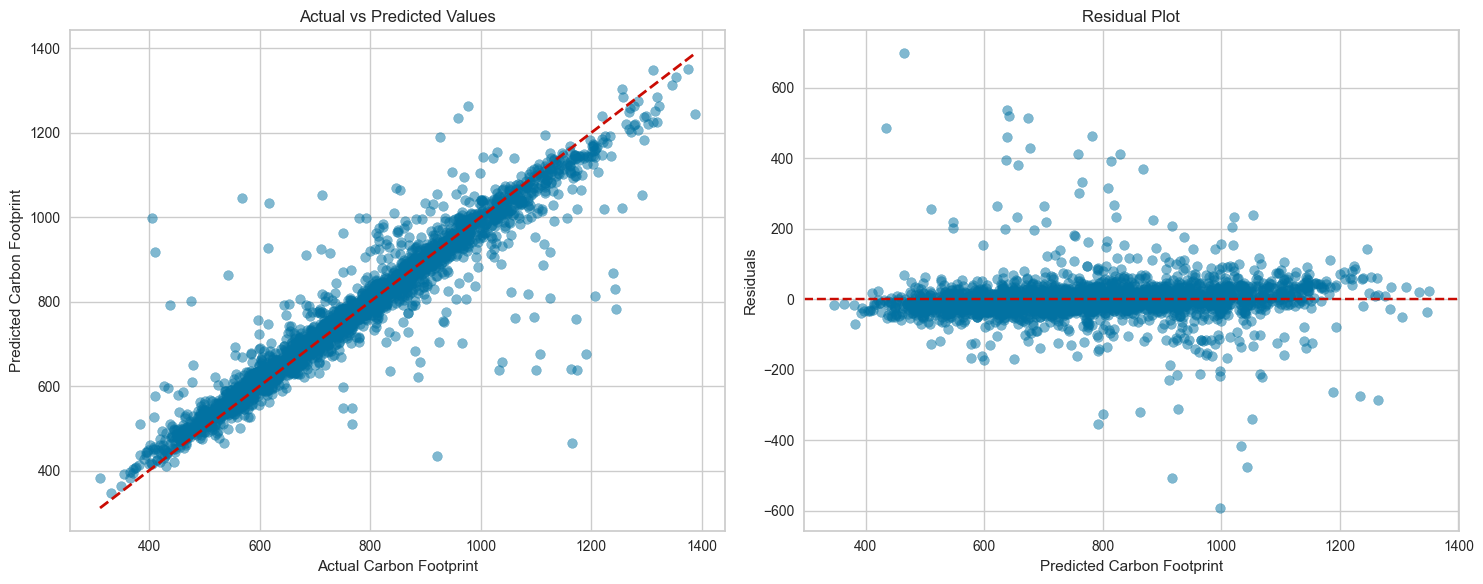

Residual Statistics:
Mean of Residuals: -0.61
Standard Deviation of Residuals: 60.13
Skewness of Residuals: 1.59


In [526]:
# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Actual vs Predicted Scatter Plot
ax1.scatter(y_test, y_pred_lgb, alpha=0.5)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax1.set_xlabel('Actual Carbon Footprint')
ax1.set_ylabel('Predicted Carbon Footprint')
ax1.set_title('Actual vs Predicted Values')

# Calculate residuals
residuals = y_test - y_pred_lgb

# Residual Plot
ax2.scatter(y_pred_lgb, residuals, alpha=0.5)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel('Predicted Carbon Footprint')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual Plot')

plt.tight_layout()
plt.show()

# Print some statistics about residuals
print('Residual Statistics:')
print(f'Mean of Residuals: {residuals.mean():.2f}')
print(f'Standard Deviation of Residuals: {residuals.std():.2f}')
print(f'Skewness of Residuals: {residuals.skew():.2f}')

In [527]:
test=pd.read_csv('./dataset/test.csv')

In [528]:
test

,ID,electricity_kwh_per_month,natural_gas_therms_per_month,vehicle_miles_per_month,house_area_sqft,water_usage_liters_per_day,public_transport_usage_per_week,household_size,home_insulation_quality,meat_consumption_kg_per_week,laundry_loads_per_week,recycles_regularly,composts_organic_waste,uses_solar_panels,energy_efficient_appliances,heating_type,diet_type,owns_pet,smart_thermostat_installed
0,0x42e7,309.73,58.89,984.73,f)0*7,332.68,3,5,3,1.86,2,0.0,0.0,0,1.0,gas,vegetarian,0,0.0
1,0x1950,278.49,48.47,841.76,1523.78,443.22,8,3,4,2.33,5,1.0,NaN,0,1.0,electric,omnivore,0,0.0
2,0x20e5,404.12,33.59,1219.33,1187.35,303.94,2,2,2,3.23,2,0.0,0.0,0,0.0,gas,omnivore,0,0.0
3,0x4378,324.74,41.93,562.96,647.43,496.58,2,1,3,4.01,7,0.0,1.0,1,1.0,electric,omnivore,1,0.0
4,0x1301,397.75,52.13,690.82,1576.17,346.56,0,5,4,2.23,6,1.0,0.0,0,0.0,none,omnivore,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0x1dde,422.80,56.70,428.54,1664.57,388.23,4,2,3,4.38,8,1.0,0.0,0,0.0,none,omnivore,1,0.0
5996,0x2c3b,423.90,58.47,906.81,2057.72,420.22,1,7,2,3.43,5,0.0,0.0,0,0.0,gas,omnivore,0,NaN
5997,0x4b6,440.94,44.60,1293.12,917.63,402.39,1,3,2,3.39,9,0.0,0.0,0,1.0,gas,omnivore,0,0.0
5998,0x4d5a,403.28,45.78,794.25,1784.37,495.33,2,wsnaV,1,2.39,2,1.0,0.0,0,NaN,electric,omnivore,1,0.0


In [529]:
test=test.drop(columns=['ID'])

In [530]:
test.isna().sum()

electricity_kwh_per_month            0
natural_gas_therms_per_month         0
vehicle_miles_per_month              0
house_area_sqft                      0
water_usage_liters_per_day           0
public_transport_usage_per_week      0
household_size                       0
home_insulation_quality              0
meat_consumption_kg_per_week         0
laundry_loads_per_week               0
recycles_regularly                 179
composts_organic_waste             200
uses_solar_panels                    0
energy_efficient_appliances        162
heating_type                         0
diet_type                            0
owns_pet                             0
smart_thermostat_installed         174
dtype: int64

In [531]:
# Get the mode (most frequent value) and fill NaN values
mode_value = test['recycles_regularly'].mode()[0]
test['recycles_regularly'] = test['recycles_regularly'].fillna(mode_value)

# Verify there are no more null values
print("Null values after filling:", test['recycles_regularly'].isna().sum())

Null values after filling: 0


In [532]:
# Get the mode (most frequent value) and fill NaN values
mode_value = test['composts_organic_waste'].mode()[0]
test['composts_organic_waste'] = test['composts_organic_waste'].fillna(mode_value)

# Verify there are no more null values
print("Null values after filling:", test['composts_organic_waste'].isna().sum())

Null values after filling: 0


In [533]:
# Get the mode (most frequent value) and fill NaN values
mode_value = test['smart_thermostat_installed'].mode()[0]
test['smart_thermostat_installed'] = test['smart_thermostat_installed'].fillna(mode_value)

# Verify there are no more null values
print("Null values after filling:", test['smart_thermostat_installed'].isna().sum())

Null values after filling: 0


In [534]:
test['energy_efficient_appliances'].unique()
# Get the mode (most frequent value) and fill NaN values
mode_value = test['energy_efficient_appliances'].mode()[0]
test['energy_efficient_appliances'] = test['energy_efficient_appliances'].fillna(mode_value)

# Verify there are no more null values
print("Null values after filling:", test['energy_efficient_appliances'].isna().sum())

Null values after filling: 0


In [535]:
test['diet_type']=test['diet_type'].astype('category')
test['diet_type']=test['diet_type'].cat.codes

In [536]:
test['heating_type'] = test['heating_type'].apply(lambda x: x if x in ['gas', 'electric'] else 'unknown')

# Verify the changes
print(test['heating_type'].value_counts())
test['heating_type']=test['heating_type'].astype('category')
test['heating_type']=test['heating_type'].cat.codes

heating_type
gas         2921
electric    2357
unknown      722
Name: count, dtype: int64


In [537]:
test['house_area_sqft'] = (
    test['house_area_sqft']
    .replace(r'[^0-9.]', '', regex=True)  
    .replace(r'^\.+$', '', regex=True)   
    .replace('', None)                   
)


test['house_area_sqft'] = pd.to_numeric(test['house_area_sqft'], errors='coerce')


print("Data type after conversion:", test['house_area_sqft'].dtype)
print("\nSample of converted values:")
print(test['house_area_sqft'].head())

Data type after conversion: float64

Sample of converted values:
0       7.00
1    1523.78
2    1187.35
3     647.43
4    1576.17
Name: house_area_sqft, dtype: float64


In [538]:
test.dtypes

electricity_kwh_per_month          float64
natural_gas_therms_per_month       float64
vehicle_miles_per_month            float64
house_area_sqft                    float64
water_usage_liters_per_day         float64
public_transport_usage_per_week      int64
household_size                      object
home_insulation_quality              int64
meat_consumption_kg_per_week       float64
laundry_loads_per_week               int64
recycles_regularly                 float64
composts_organic_waste             float64
uses_solar_panels                    int64
energy_efficient_appliances        float64
heating_type                          int8
diet_type                             int8
owns_pet                             int64
smart_thermostat_installed         float64
dtype: object

In [539]:
test['household_size'] = test['household_size'].apply(lambda x: x if str(x).isdigit() else np.nan)

# Step 2: Fill NaN with the most frequent (mode) value
most_frequent = test['household_size'].mode()[0]
test['household_size'] = test['household_size'].fillna(most_frequent)
test['household_size']=test['household_size'].astype('category')
test['household_size']=test['household_size'].cat.codes

In [540]:
mean_value = test['house_area_sqft'].mean()
test['house_area_sqft'] = test['house_area_sqft'].fillna(mean_value)

# Verify there are no more null values
print("Null values after filling:", test['house_area_sqft'].isna().sum())

Null values after filling: 0


In [541]:
test.isna().sum()

electricity_kwh_per_month          0
natural_gas_therms_per_month       0
vehicle_miles_per_month            0
house_area_sqft                    0
water_usage_liters_per_day         0
public_transport_usage_per_week    0
household_size                     0
home_insulation_quality            0
meat_consumption_kg_per_week       0
laundry_loads_per_week             0
recycles_regularly                 0
composts_organic_waste             0
uses_solar_panels                  0
energy_efficient_appliances        0
heating_type                       0
diet_type                          0
owns_pet                           0
smart_thermostat_installed         0
dtype: int64

In [542]:
negative_columns = test.columns[(test < 0).any()]
print("Columns with negative values:\n", negative_columns)


Columns with negative values:
 Index(['electricity_kwh_per_month', 'natural_gas_therms_per_month',
       'vehicle_miles_per_month', 'water_usage_liters_per_day',
       'public_transport_usage_per_week', 'home_insulation_quality'],
      dtype='object')


In [543]:
columns_to_clean = ['electricity_kwh_per_month', 'natural_gas_therms_per_month',
       'vehicle_miles_per_month', 'water_usage_liters_per_day',
       'public_transport_usage_per_week', 'home_insulation_quality']

# Replace negative values with NaN
for col in columns_to_clean:
    test[col] = test[col].apply(lambda x: np.nan if x < 0 else x)

# Fill NaN with median (or mean, mode — your choice)
for col in columns_to_clean:
    test[col] = test[col].fillna(test[col].median())

In [544]:
negative_columns = test.columns[(test < 0).any()]
print("Columns with negative values:\n", negative_columns)

Columns with negative values:
 Index([], dtype='object')


In [545]:
test.head(5)

,electricity_kwh_per_month,natural_gas_therms_per_month,vehicle_miles_per_month,house_area_sqft,water_usage_liters_per_day,public_transport_usage_per_week,household_size,home_insulation_quality,meat_consumption_kg_per_week,laundry_loads_per_week,recycles_regularly,composts_organic_waste,uses_solar_panels,energy_efficient_appliances,heating_type,diet_type,owns_pet,smart_thermostat_installed
0,309.73,58.89,984.73,7.00,332.68,3.0,4,3.0,1.86,2,0.0,0.0,0,1.0,1,2,0,0.0
1,278.49,48.47,841.76,1523.78,443.22,8.0,2,4.0,2.33,5,1.0,0.0,0,1.0,0,0,0,0.0
2,404.12,33.59,1219.33,1187.35,303.94,2.0,1,2.0,3.23,2,0.0,0.0,0,0.0,1,0,0,0.0
3,324.74,41.93,562.96,647.43,496.58,2.0,0,3.0,4.01,7,0.0,1.0,1,1.0,0,0,1,0.0
4,397.75,52.13,690.82,1576.17,346.56,0.0,4,4.0,2.23,6,1.0,0.0,0,0.0,2,0,0,0.0


In [546]:
test['public_transport_usage_per_week'].unique()

array([ 3.,  8.,  2.,  0.,  1.,  4.,  9.,  6.,  5.,  7., 12., 20., 11.,
       10., 14., 13., 22., 17., 15., 16., 18.])

In [547]:
df['public_transport_usage_per_week'].unique()

array([ 1.,  0.,  5.,  8.,  2.,  4.,  9.,  3.,  6., 10.,  7., 13., 14.,
       11., 12., 16., 15., 17.])

In [548]:
scale_cols = [
    'electricity_kwh_per_month',
    'natural_gas_therms_per_month',
    'vehicle_miles_per_month',
    'house_area_sqft',
    'water_usage_liters_per_day',
    'meat_consumption_kg_per_week',
    'laundry_loads_per_week'
]
scaler = StandardScaler()
test[scale_cols] = scaler.fit_transform(test[scale_cols])

In [549]:
y_predicted = lgb_model.predict(test)

In [550]:
y_predicted
data=pd.read_csv('./dataset/test.csv')
submission = pd.DataFrame({
    'ID': data['ID'],
    'carbon_footprint': y_predicted
})

In [551]:
submission.to_csv('submission.csv', index=False)
submission.head()

,ID,carbon_footprint
0,0x42e7,637.466091
1,0x1950,700.820333
2,0x20e5,1034.691516
3,0x4378,781.372148
4,0x1301,795.528940
